In [11]:
-- 1. feladat: Nyelvek szerint csoportosítva ennyi darab DVD van.

select  nyelvek.lang as 'Nyelv',
        count(*) as 'Darab'
from dvd
join nyelvek on dvd.lang = nyelvek.id
group by nyelvek.lang
order by 2 desc

(8 rows affected)

Total execution time: 00:00:00.015

Nyelv,Darab
magyar,196
angol,90
német,11
olasz,5
angol/német,5
francia,5
orosz,2
magyar/angol,1


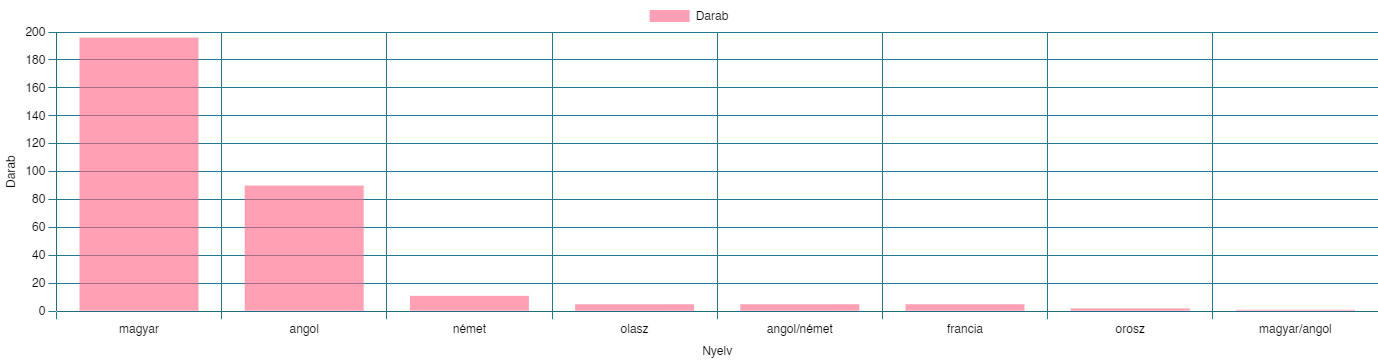

In [23]:
-- 2. feladat: DVD-k árai és jellemzői

select  MIN(nettoar) as 'Min ár',
        MAX(nettoar) as 'Max ár',
        round(AVG(nettoar),0) as 'Átlag',
        round(STDEV(nettoar),0) as 'Szórás'
from dvd

(1 row affected)

Total execution time: 00:00:00.010

Min ár,Max ár,Átlag,Szórás
3102,6098,4682,872


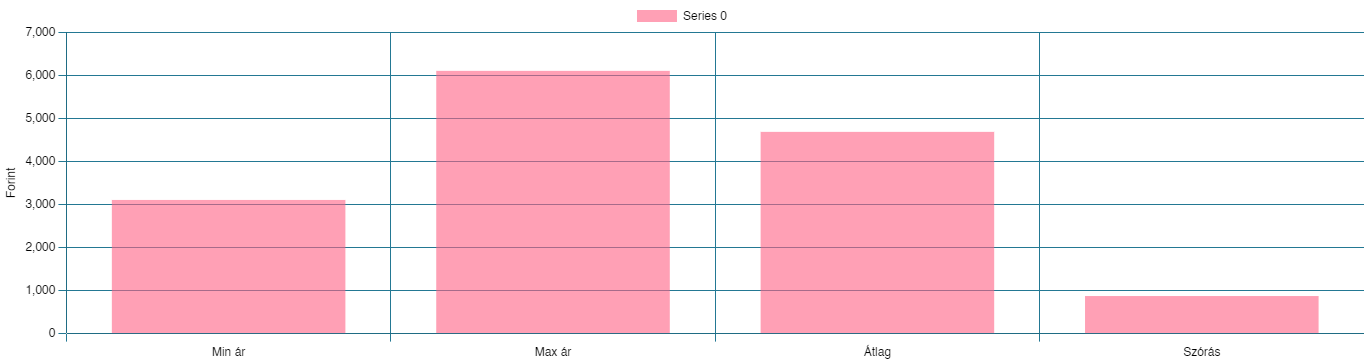

In [58]:
-- 3. feladat: NULL értékek a DVD adatbázis nyelv oszlopában

select  case when lang is null then 'Üres'
             when lang is not null then 'Nem üres'
             end as 'Nyelv',
        count(*) as 'Darab'
from dvd
group by case when lang is null then 'Üres'
              when lang is not null then 'Nem üres'
              end

(2 rows affected)

Total execution time: 00:00:00.013

Nyelv,Darab
Nem üres,315
Üres,3


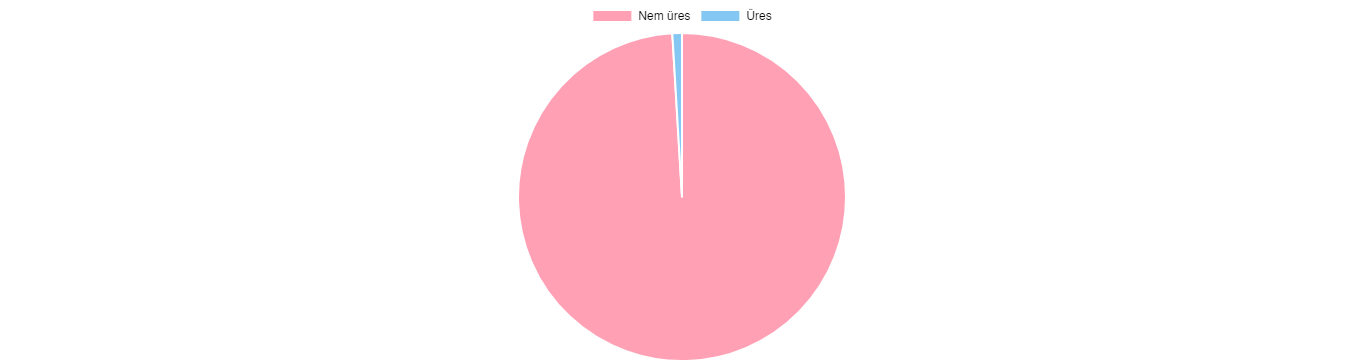

In [142]:
-- 4. feladat: NULL értékek aránya

select  sum(case when lang is null then 1
                       when lang is not null then 0
                       end)/cast(count(*) as decimal(5,0))*100
        as 'Hiányzó címek százalékos aránya (%)'
from dvd

(1 row affected)

Total execution time: 00:00:00.010

Hiányzó címek százalékos aránya (%)
0.943300


In [153]:
-- 5. feladat: Kiugró árértékek száma

DECLARE 
@min int = 3500,
@max int = 5500; 

select  SUM(CASE WHEN nettoar < @min THEN 1 ELSE 0 end) AS  '3500 Ft alatt',
        SUM(CASE WHEN nettoar BETWEEN @min and @max THEN 1 ELSE 0 end) AS '3500~5500 Ft',
        SUM(CASE WHEN nettoar > @max THEN 1 ELSE 0 end) AS '5500 Ft felett'
        from dvd

(1 row affected)

Total execution time: 00:00:00.008

3500 Ft alatt,3500~5500 Ft,5500 Ft felett
35,212,71


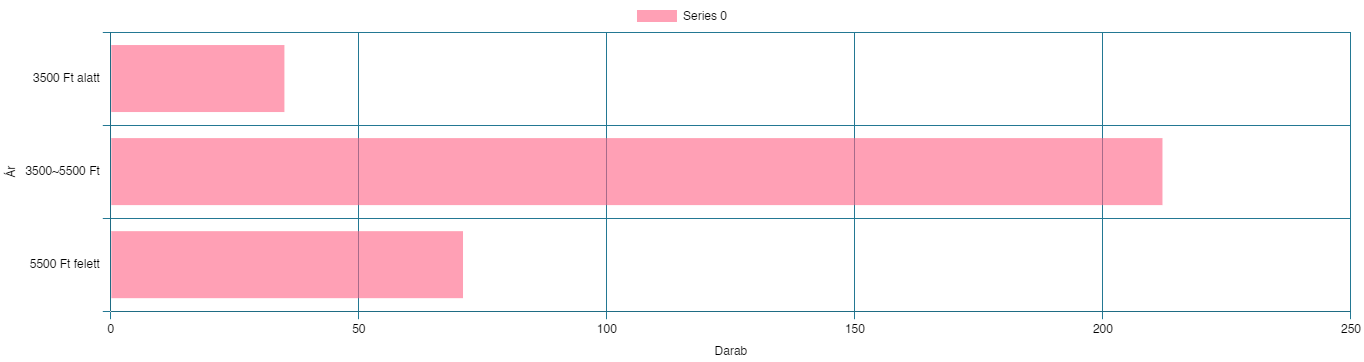

In [170]:
-- 6. feladat: Legnépszerűbb, nem játék DVD-k

select  top 5 stilus as 'Stílus',
        count(*) 'Darabszám'
from dvd
where stilus not like '%játék%'
group by stilus
order by count(*) desc

(5 rows affected)

Total execution time: 00:00:00.011

Stílus,Darabszám
ismeretterjesztő,46
nyelvtanító,42
történelem,41
földrajz,16
irodalom,16


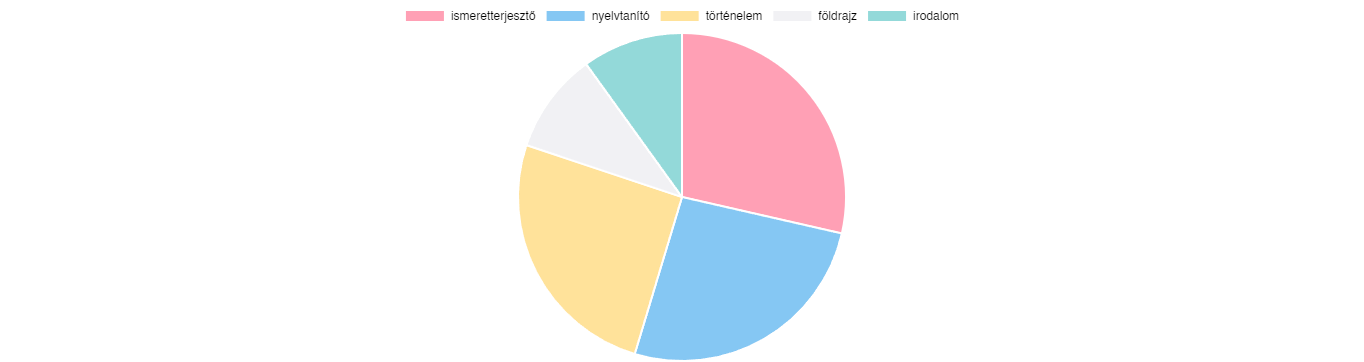